In [663]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import missingno as msno


1. Problem definition
2. Data collection
3. Data cleaning & Preprocessing
4. Exploratory Data Analysis
5. Model training
6. Hyperparameter tuning
7. Error analysis
8. Model evaluation

In [664]:
#Load the data
train=pd.read_csv(r'C:\Users\Work\Desktop\Supervised_Machine_Learning\train.csv')
test=pd.read_csv(r'C:\Users\Work\Desktop\Supervised_Machine_Learning\test.csv')

In [665]:
train.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


## Data Cleaning and Preprocessing

In [666]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

In [667]:
train.columns

Index(['id', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [668]:
train.columns[train.isnull().sum()>0]

Index([], dtype='object')

In [669]:
#check for duplicates
all_duplicates=train.duplicated()
print(all_duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
15284    False
15285    False
15286    False
15287    False
15288    False
Length: 15289, dtype: bool


In [670]:
#correct the inconsistencies in column names
train.columns=train.columns.str.lower()

In [671]:
train.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,maxofuppertrange,minofuppertrange,averageofuppertrange,maxoflowertrange,minoflowertrange,averageoflowertrange,rainingdays,averagerainingdays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


## Exploratory Data Analysis

The essence is to explore/investigate the relationship of the independent features with the dependent features and the relationship of the independent features amongst themselves.

1. Univariate Analysis
2. Bivariate Analysis
3. Multivariate Analysis

**Univariate Analysis**

**1. What is the distribution of the yield in the dataset?**

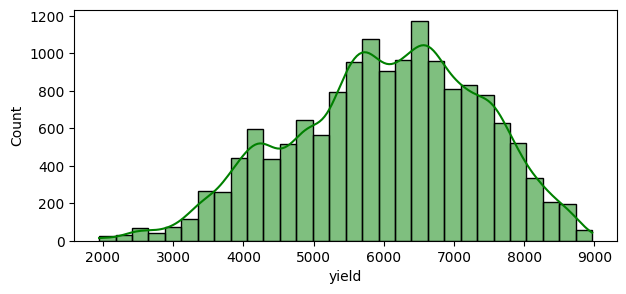

In [672]:
plt.figure(figsize=(7,3))

sns.histplot(train['yield'],kde=True,bins=30,color='green')



plt.show()

In [673]:
# Descriptive statistics
print(train['yield'].describe())

count    15289.000000
mean      6025.193999
std       1337.056850
min       1945.530610
25%       5128.163510
50%       6117.475900
75%       7019.694380
max       8969.401840
Name: yield, dtype: float64


In [674]:
print(f"\n2. Yield Statistics:")
print(f"Mean: {train['yield'].mean():.2f}")
print(f"Median: {train['yield'].median():.2f}")
print(f"Skewness: {train['yield'].skew():.3f}")


2. Yield Statistics:
Mean: 6025.19
Median: 6117.48
Skewness: -0.291


The yield distribution appears to be normal with a slight left skew. The average yield is 6025.19. Mean and median are close, suggesting a relatively symmetric distribution. The Standard deviation is 1337.05, indicating moderate variability in yield across different conditions. Some yields are very low eg. 1945.53, which could be due to:
- Poor pollination (low bee activity)
- Adverse weather (high raining days)
- Experimental or controlled low-yield scenarios

The yield is likely influenced by various factors like:
- Bee activity (osmia, andrena, etc.)
- Temperature ranges (MaxOfUpperTRange, AverageOfLowerTRange, etc.)
- Rainfall (RainingDays, AverageRainingDays)
- Fruit set and seed count

In [675]:
# The first column is an index duplicate, let's drop it
train.drop('id',axis=1,inplace=True)

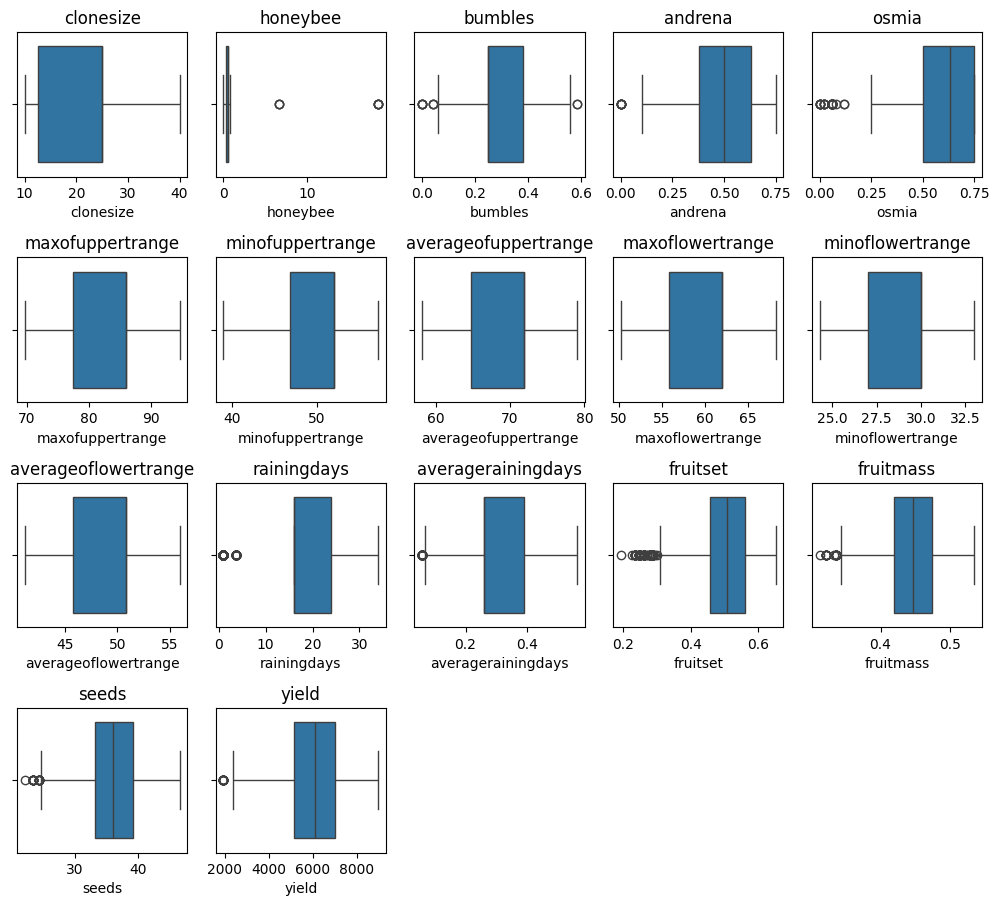

In [676]:
fig = plt.figure(figsize=(10,20))
for i in range(len(train.columns)):
    ax=fig.add_subplot(9, 5, i+1)
    sns.boxplot(x=train.iloc[:, i],ax=ax)
    ax.set_title(train.columns[i])
plt.tight_layout()
plt.show()

Lower outliers are more significant than the upper ones in yields. The lower outliers are however not extreme. There are no yields below 1945.53. The lower outliers indicate vulnerability to poor conditions. It appears plausible exhibiting expected crop behaviour.

**2. How do the different bees compare in density?**


In [677]:
bee_cols=['honeybee','bumbles','andrena','osmia']
df_long=train.melt(value_vars=bee_cols,
                   var_name='bee_species',
                   value_name='density')
df_long.head()

,bee_species,density
0,honeybee,0.50
1,honeybee,0.50
2,honeybee,0.25
3,honeybee,0.25
4,honeybee,0.50


In [678]:
#Average Density
ranking = df_long.groupby('bee_species')['density'].mean().sort_values(ascending=False)
print("Average Density Ranking:", ranking.round(3))

Average Density Ranking: bee_species
osmia       0.592
andrena     0.493
honeybee    0.389
bumbles     0.287
Name: density, dtype: float64


In [679]:
#Median
ranking = df_long.groupby('bee_species')['density'].median().sort_values(ascending=False)
print("Median Ranking:", ranking.round(3))

Median Ranking: bee_species
osmia       0.63
andrena     0.50
honeybee    0.50
bumbles     0.25
Name: density, dtype: float64


In [680]:
#Skewness
ranking = df_long.groupby('bee_species')['density'].skew().sort_values(ascending=False)
print("Skewness Ranking:", ranking.round(3))

Skewness Ranking: bee_species
honeybee    41.613
bumbles      0.816
andrena      0.162
osmia       -0.845
Name: density, dtype: float64


**Osmia bees are the most abundant pollinators- Elite Performers**
- Highest average density: 0.592 (59.2%)
- Highest median: 0.63
- Left-skewed distribution: -0.845 skew

**Andrena bees come in second- Steady Workers**
- Good density: 0.493 (49.3%)
- Balanced distribution: Near-zero skew (0.162) - very normal distribution
- Consistent performer: Median of 0.50 matches mean well

**Honeybees take the 3rd place- outlier dependent**
- Density: 0.389 density (38.9%)
- Extreme right skew: 41.613
- Bimodal distribution: Mostly low with rare extreme high values    

**Bumble Bees are the Lowest- variable contributors**
- Lowest density: 0.287 (28.7%)
- Right-skewed: 0.816 (moderate skew toward higher values)
- Median of 0.25: Half the observations are very low density

Osmia bees are the most abundant pollinators with the highest and most consistent density. Investment should be primarily directed towards habitats and conservation efforts for Osmia bees. A few lower outliers can be observed in Osmia bees, they are however not extreme. The mean and median are close, which suggests a relatively symmetric distribution. Moreover, Andrena bees demonstrate a very good and consistent density, they should be utilized as excellent secondary pollinators. A balanced and normal distribution can be observed.

Honeybees are extremely bimodal.They are either virtually absent or overwhelmingly present with very little middle ground. This makes them poor candidates for reliable pollination services.Their extreme variability means you cannot build a consistent pollination strategy around them. 

Honeybees data should also be verified as skewness of 41.6 is extremely unusual. An evaluation may be needed as it may not be delivering the expected density. Additionally, it will be important to ascertain the measurement errors in honeybee density recordings. 

Bumble Bees, on the other hand, have a manageable variability; you may influence their presence with habitat improvements such as predictable responses to farming practices and gradual improvements that may be implemented through conservation.

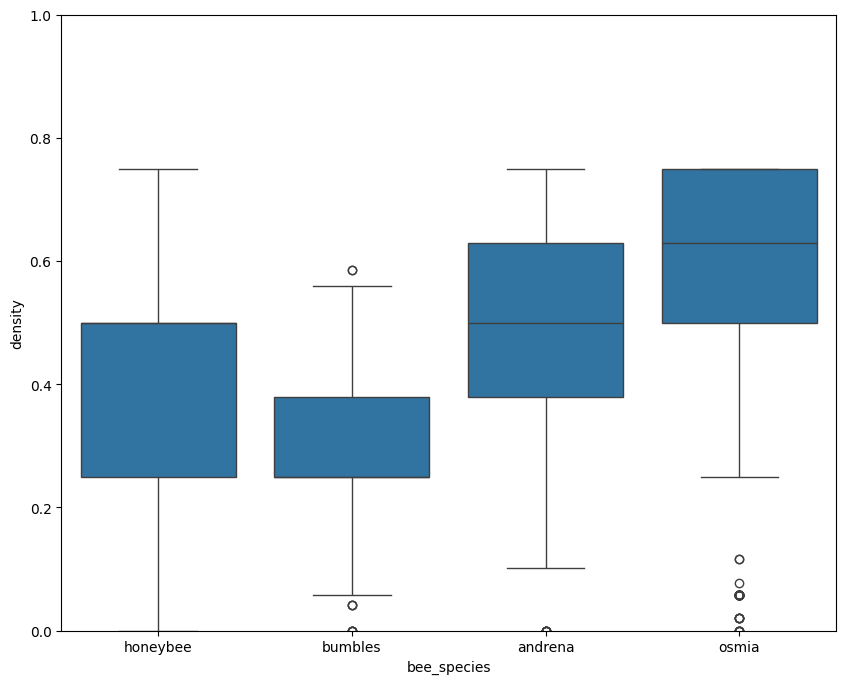

In [681]:
plt.figure(figsize=(10,8))

sns.boxplot(x='bee_species',y='density', data=df_long)
plt.ylim(0,1)



plt.show()

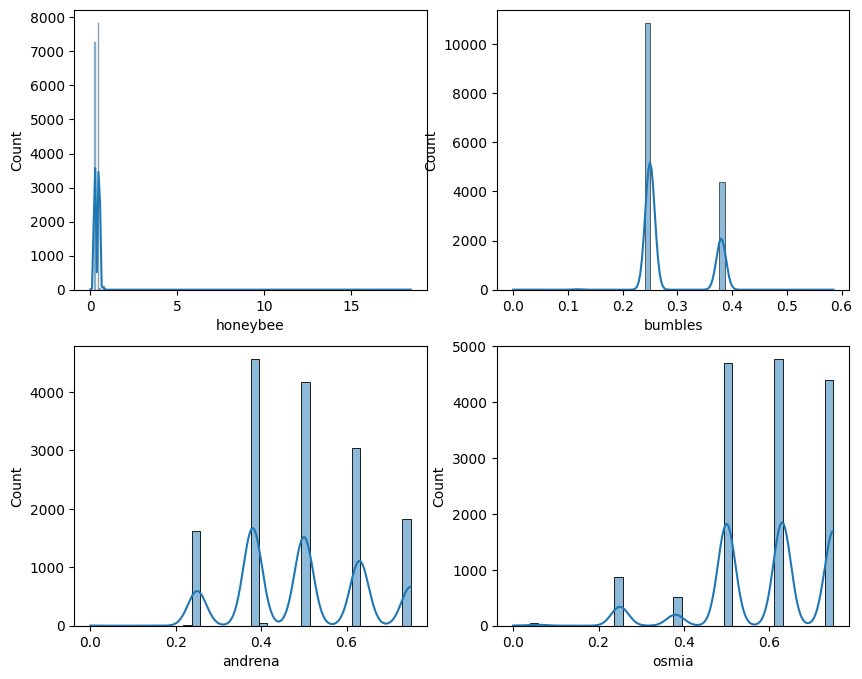

In [682]:
fig, ax=plt.subplots(nrows =2,ncols=2,figsize=(10,8))

sns.histplot(train['honeybee'],kde=True,ax=ax[0,0])
sns.histplot(train['bumbles'],kde=True,ax=ax[0,1])
sns.histplot(train['andrena'],kde=True,ax=ax[1,0])
sns.histplot(train['osmia'],kde=True,ax=ax[1,1])

plt.show()


**3. What is the average daily temperature?**

In [683]:
#Estimated Average Daily Temperature
avg_daily_temp = (train['averageofuppertrange'].mean() + train['averageoflowertrange'].mean()) / 2
print(f"Estimated Average Daily Temperature: {avg_daily_temp:.1f}°F")

Estimated Average Daily Temperature: 58.6°F


In [684]:
estimated_daily_avg = (train['averageofuppertrange'] + train['averageoflowertrange']) / 2

# Calculate range
temp_range = estimated_daily_avg.max() - estimated_daily_avg.min()
min_temp = estimated_daily_avg.min()
max_temp = estimated_daily_avg.max()

print(f"Temperature Range: {min_temp:.1f}°F to {max_temp:.1f}°F")
print(f"Total Range Span: {temp_range:.1f}°F")

Temperature Range: 49.7°F to 67.5°F
Total Range Span: 17.8°F


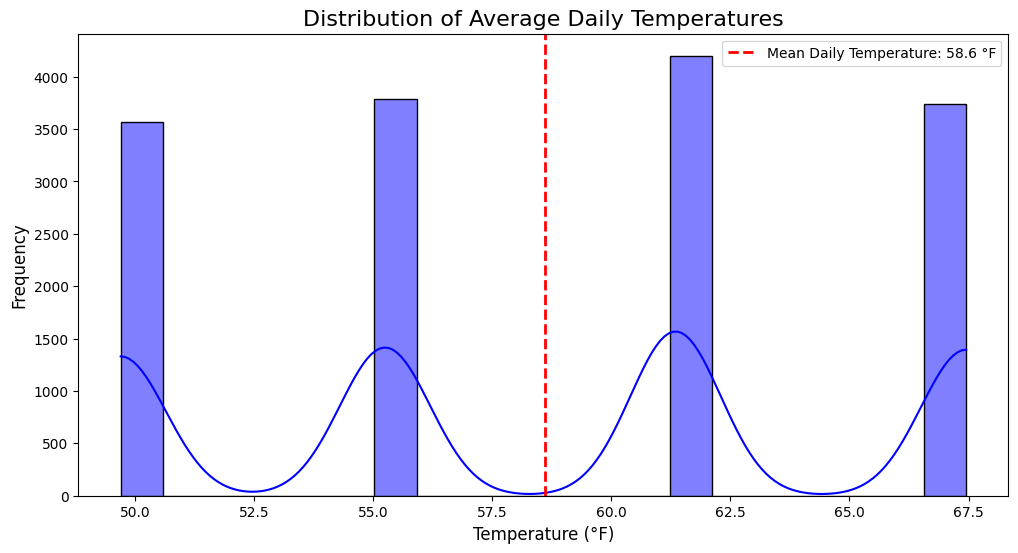

In [685]:
plt.figure(figsize=(12, 6))
estimated_daily_avg = (train['averageofuppertrange'] + train['averageoflowertrange']) / 2

# Calculate the mean of the estimated daily averages
mean_daily_temp = estimated_daily_avg.mean()

sns.histplot(estimated_daily_avg, bins=20, kde=True, color='blue')
plt.axvline(mean_daily_temp, color='red', linestyle='--', linewidth=2,
            label=f'Mean Daily Temperature: {mean_daily_temp:.1f} °F')
plt.title('Distribution of Average Daily Temperatures', fontsize=16)
plt.xlabel('Temperature (°F)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()

The Mean Daily Temperature is 58.6°F. It appears to be a normal distribution centered around the mean. The temperature range is 49.7°F to 67.5°F. The temperature data suggests that the crops are growing in very favorable thermal conditions for pollination and fruit development.

**Bivariate Analysis**

<Figure size 1000x800 with 0 Axes>

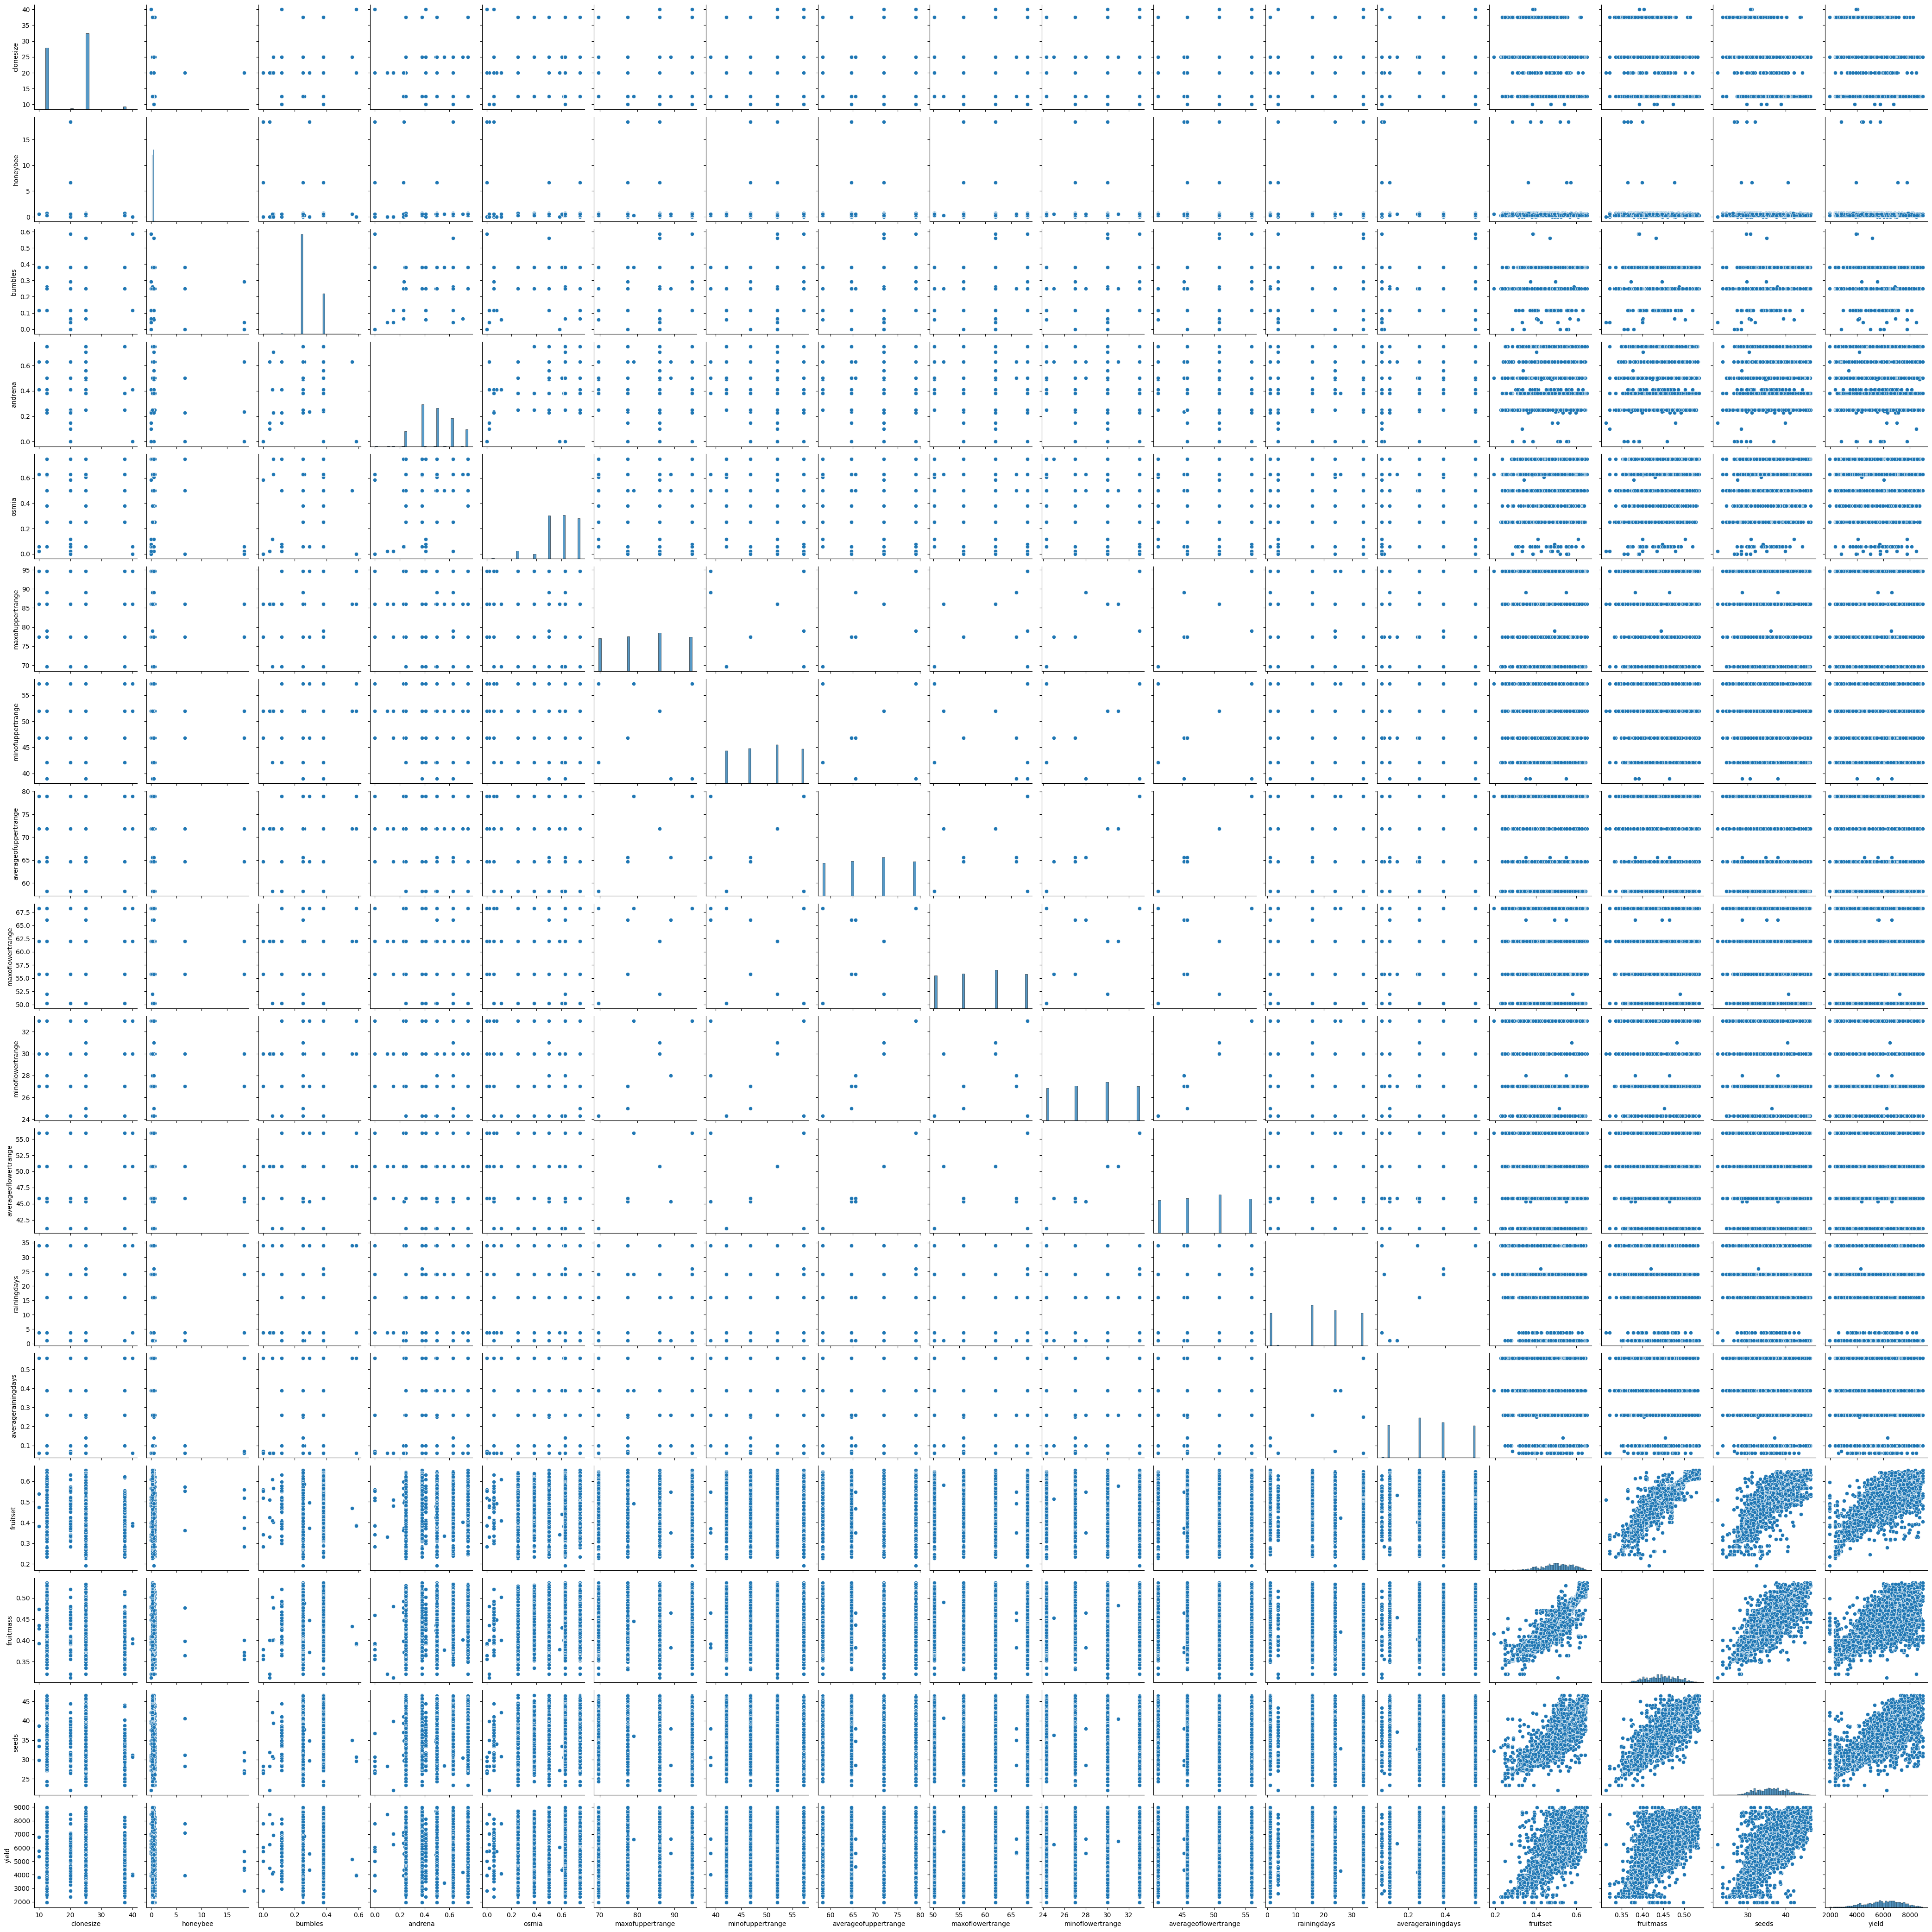

In [686]:
plt.figure(figsize=(10,8))

sns.pairplot(train)
plt.show()

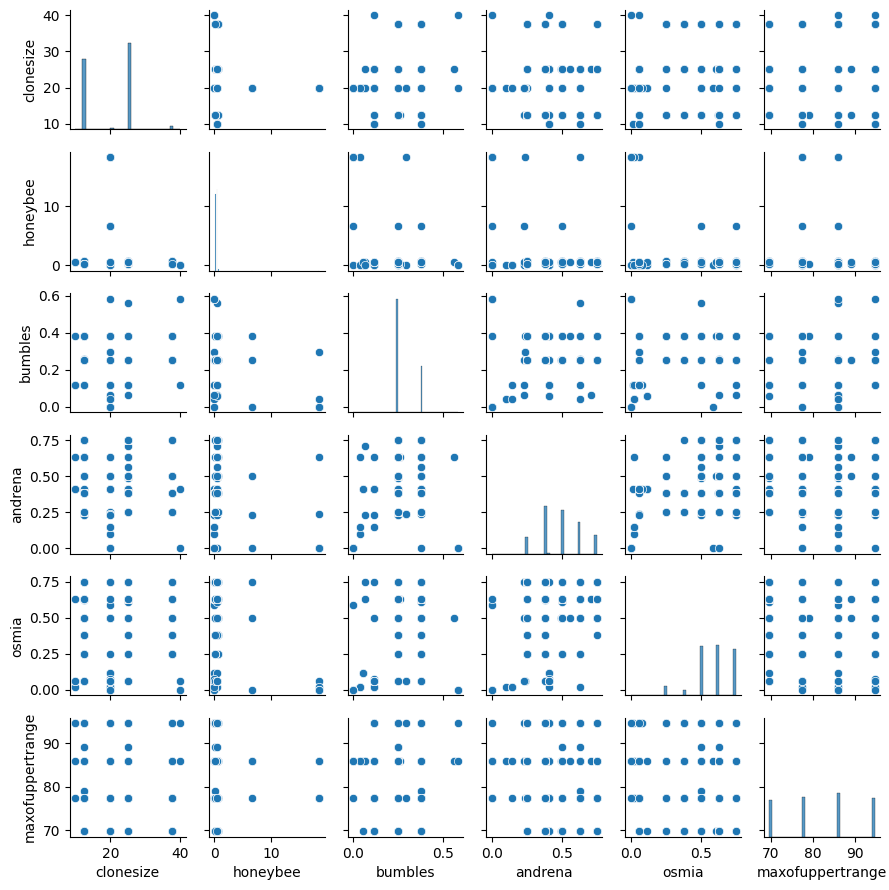

In [687]:
#To increase visibility, I have divided the columns into 3 parts 
#First 6 columns
sns.pairplot(train.iloc[:, :6], height=1.5)
plt.tight_layout()
plt.show()

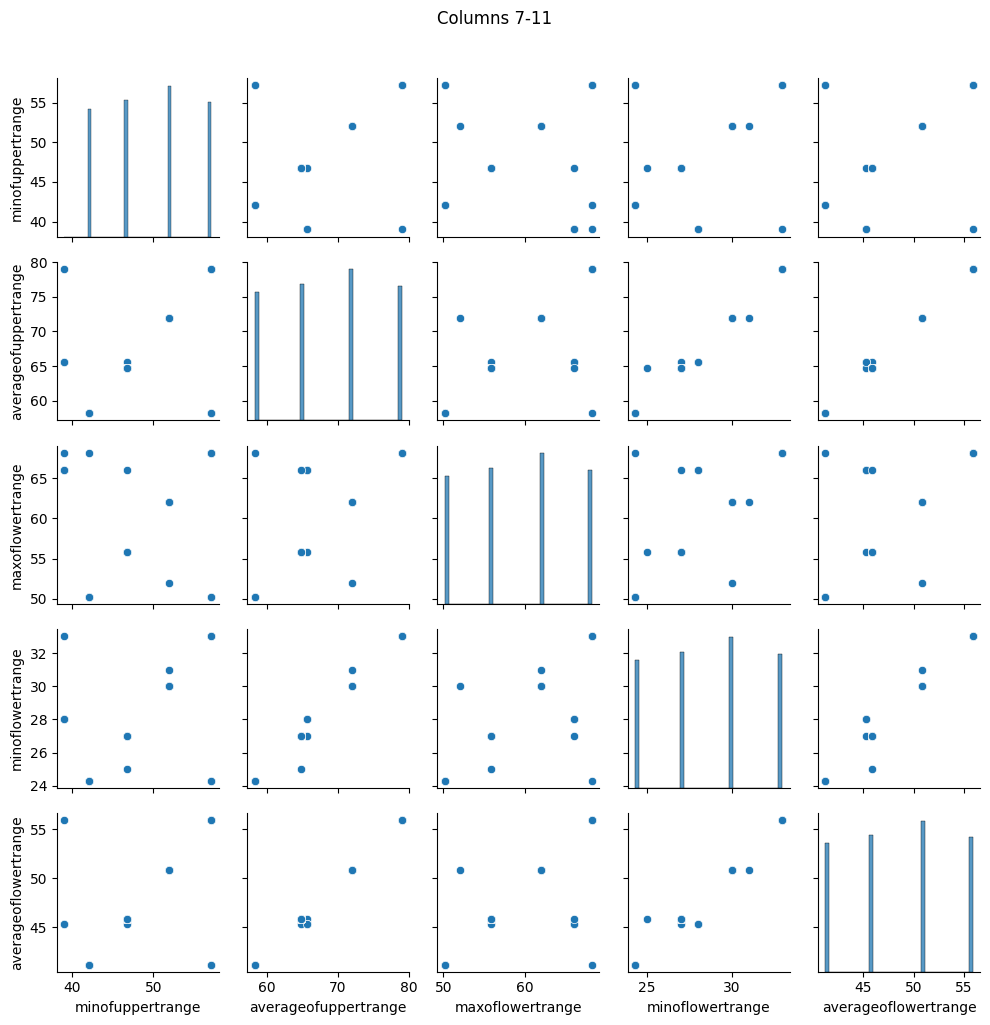

In [688]:
# Columns 7-11
sns.pairplot(train.iloc[:, 6:11], height=2)
plt.suptitle('Columns 7-11', y=1.02)
plt.tight_layout()
plt.show()

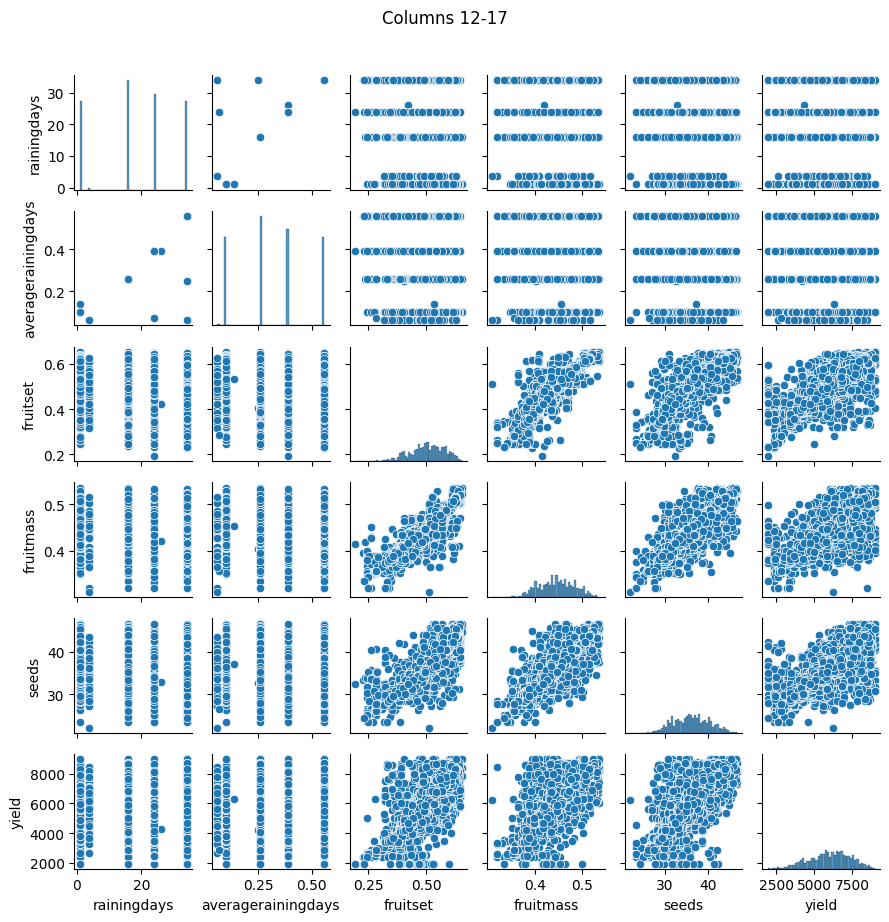

In [689]:
# Columns 12-17
sns.pairplot(train.iloc[:, 11:], height=1.5)
plt.suptitle('Columns 12-17', y=1.02)
plt.tight_layout()
plt.show()

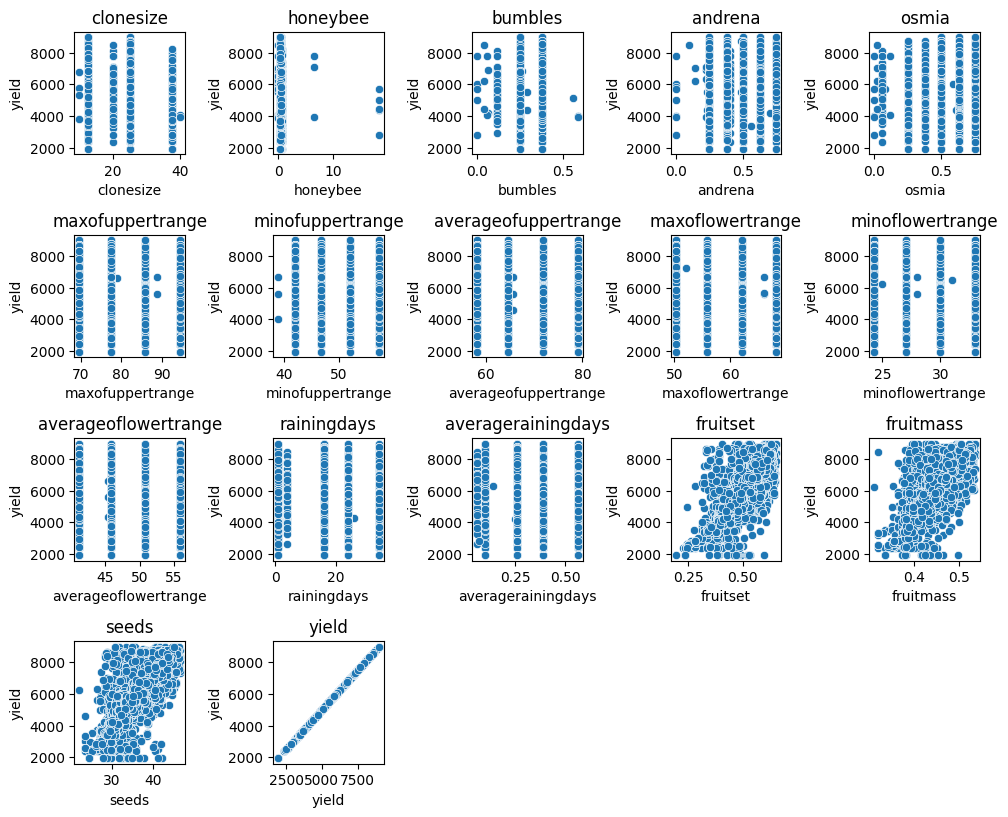

In [690]:
fig = plt.figure(figsize=(10,18))
for i in range(len(train.columns)):
    ax=fig.add_subplot(9, 5, i+1)
    sns.scatterplot(x=train.iloc[:, i],y=train['yield'],ax=ax)
    ax.set_title(train.columns[i])
plt.tight_layout()
plt.show()

**4. How does the daily average temperature affect the crop yield?**

<Axes: xlabel='DailyAvgTemp', ylabel='yield'>

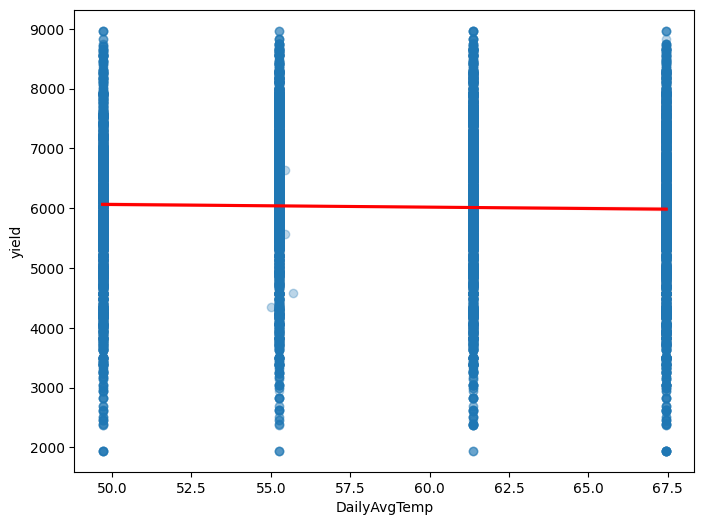

In [691]:
train['DailyAvgTemp'] = (train['averageofuppertrange'] + train['averageoflowertrange']) / 2

plt.figure(figsize=(8,6))
sns.regplot(data=train, x='DailyAvgTemp', y='yield', 
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})


In [692]:
from scipy.stats import pearsonr

# Calculate correlation
corr, p_value = pearsonr(train['DailyAvgTemp'], train['yield'])

print(f"Correlation: {corr:.2f} (p-value: {p_value:.4f})")


Correlation: -0.02 (p-value: 0.0065)


There is a weak negative correlation (-0.02) between the Daily Average Temperature and the Yield. Temperature changes don't affect yield in this dataset. It is likely that the crops are temperature-resilient, the farming system is well-adapted to local climate and that other factors dominate the yield outcomes.

We can therefore conclude that the crop varieties are suited to the temperature range. Investment may therefore be redirected from temperature monitoring resources to more important factors. These factors include pollination, water management and crop varieties. Another perspective could be that seasonal patterns, maybe temperature matters at specific times. It would be crucial to look into this issue.

**5. How does rainfall frequency impact the crop yield?**

<Axes: xlabel='rainingdays', ylabel='yield'>

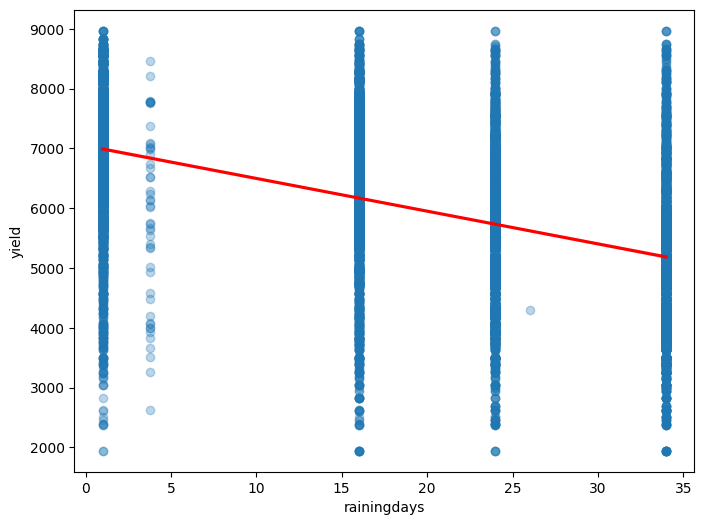

In [693]:
plt.figure(figsize=(8,6))
sns.regplot(data=train, x='rainingdays', y='yield', 
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})


In [694]:
from scipy.stats import pearsonr

# Calculate correlation
corr, p_value = pearsonr(train['rainingdays'], train['yield'])

print(f"Correlation: {corr:.2f} (p-value: {p_value:.4f})")


Correlation: -0.48 (p-value: 0.0000)


There is a strong negative correlation ( -0.48) between rainfall and the yield. This means that more rainy days significantly reduce the crop yield. Rainfall might impact the yield due to various factors- pollination disruption; bees don't fly in the rain, fungal diseases thrive in wet conditions as well as bacterial spread which increases with rain splash. Soil-borne pathogens also activate during this time. We can also infer that there may be reduced photosynthesis during cloudy days.

It may be important to diversify crops which are rain-tolerant, invest in infrastructure to protect the crops and schedule planting to avoid peak rainy seasons.

**6. How do intermediate growth metrics predict the final yield?**

**6.1 Fruitmass and Yield**

<Axes: xlabel='fruitmass', ylabel='yield'>

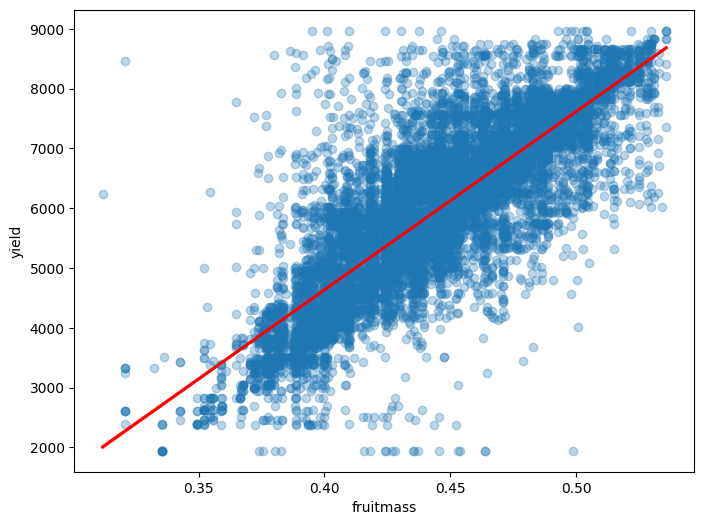

In [695]:
plt.figure(figsize=(8,6))
sns.regplot(data=train, x='fruitmass', y='yield', 
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})


In [696]:
from scipy.stats import pearsonr

# Calculate correlation
corr, p_value = pearsonr(train['fruitmass'], train['yield'])

print(f"Correlation: {corr:.2f} (p-value: {p_value:.4f})")


Correlation: 0.83 (p-value: 0.0000)


A correlation of 0.83 reveals an extremely strong positive relationship - fruit mass is directly driving the crop yield. It is possible to now predict final outcomes with remarkable accuracy by monitoring this single metric. This is likely to transform the ability to manage production, plan operations and maximize profitability.

Breeding programs could be implemented for higher fruit mass potential. Additionally, cultural practices could also be implemented in order to maximize fruit size.

**6.2 Fruitset and Yield**

<Axes: xlabel='fruitset', ylabel='yield'>

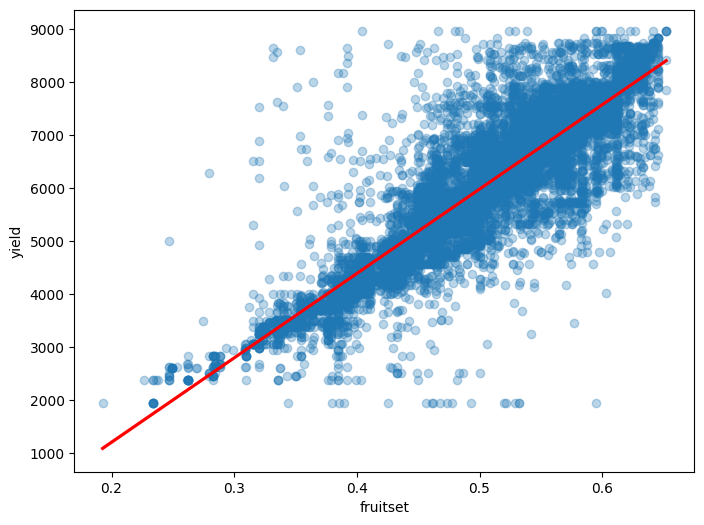

In [697]:
plt.figure(figsize=(8,6))
sns.regplot(data=train, x='fruitset', y='yield', 
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})

In [698]:
from scipy.stats import pearsonr

# Calculate correlation
corr, p_value = pearsonr(train['fruitset'], train['yield'])

print(f"Correlation: {corr:.2f} (p-value: {p_value:.4f})")


Correlation: 0.89 (p-value: 0.0000)


A correlation of 0.89 is extraordinary - fruit set is virtually synonymous with the final yield. This means that fruit mass matters, but it's a consequence of a good fruit set. The temperature may not matter if the fruit set is achieved, rainfall may also disrupt the fruit set.

Resources should therefore be directed towards monitoring daily fruit set measurements and real-time pollination optimization. Weather shelters could also be used during the flowering stage.

**6.3 Seeds and Yield**

<Axes: xlabel='seeds', ylabel='yield'>

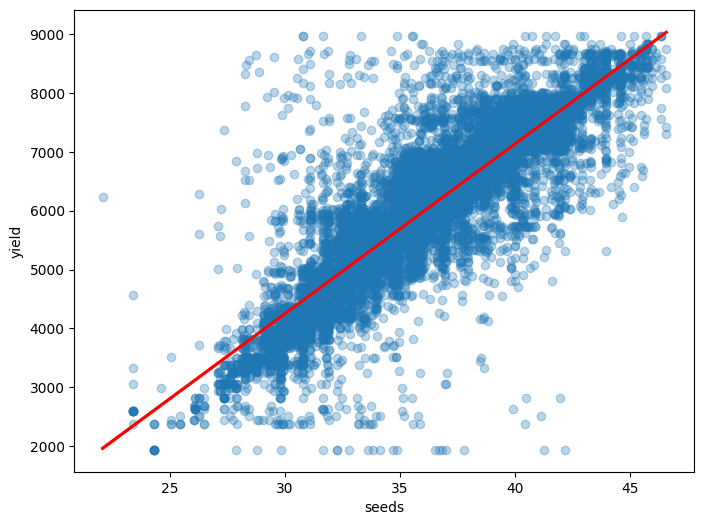

In [699]:
plt.figure(figsize=(8,6))
sns.regplot(data=train, x='seeds', y='yield', 
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})


In [700]:
from scipy.stats import pearsonr

# Calculate correlation
corr, p_value = pearsonr(train['seeds'], train['yield'])

print(f"Correlation: {corr:.2f} (p-value: {p_value:.4f})")


Correlation: 0.87 (p-value: 0.0000)


With seeds at 0.87, we now have the three pillars of yield prediction:fruit mass, fruit set and seeds. Each step is crucial; the fruit set involves getting the flowers to become fruits, seeds include successful fertilization and development while fruit mass includes fruit growth and filling. In order for fertilization to be successful key metrics should be taken into consideration. These includes the seed count and fruit retention.

**Multivariate Analysis**

<Axes: >

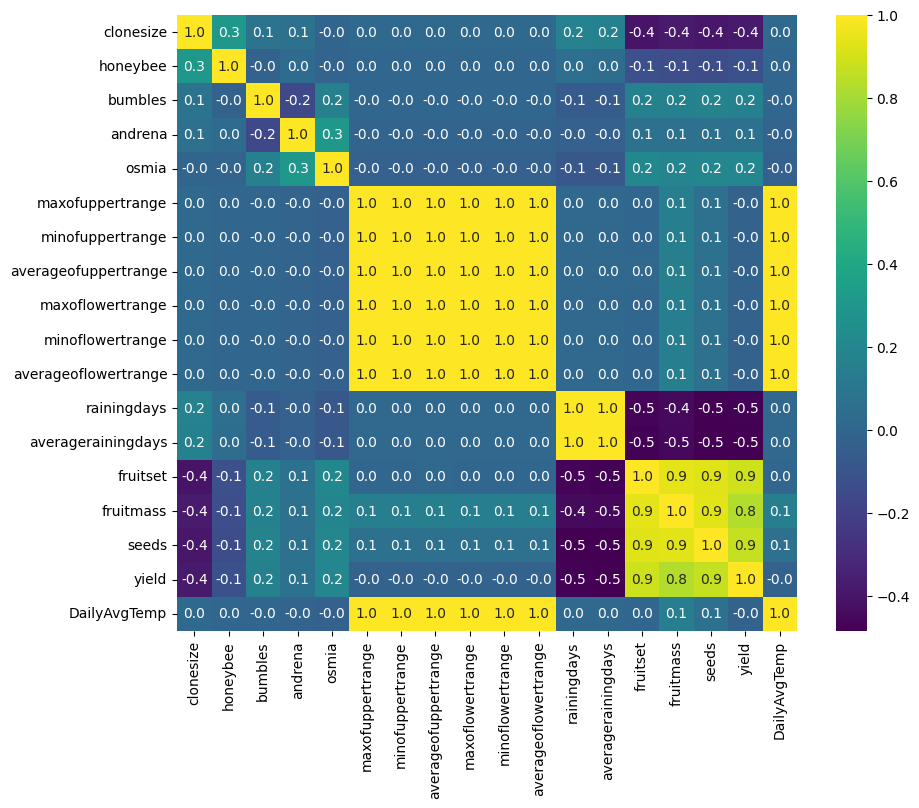

In [701]:
corr=train.corr()
#top_features=
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='viridis',fmt='.1f')

**Bee density & Crop Production**
- Honeybees have negative correlations(-0.1) across fruitset, fruitmass, seeds and yield. They are not effective pollinators. They may be competing with better pollinators. We have also observed that a data quality check may be required.
- Bumbles and Osmia bees have weak positive correlations (0.2) across fruitset, fruitmass, seeds and yield. They are slighlty better than honeybees. Andrena bees on the other hand have a positive correlation of 0.1 across the aforementioned metrics. They have a minimal effect overall.
- The yield correlates very strongly with the fruitset, fruitmass and seeds.The bees, however don't correlate with these. We can therefore conclude that the crops obtain adequate pollination. Investment in more bee hives may not be necessary.
- Other factors that may be necessary to consider include; soil moisture and nutrients, plant health indicators and environmental conditions. The bees should be seen as ecosystem services and not production tools.

In [702]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import warnings
warnings.filterwarnings('ignore')



In [703]:
clean_predictors = [
    'DailyAvgTemp',      # Represents all temperature info
    'rainingdays',       # Represents rainfall frequency
    'seeds',             # Good yield predictor  
    'honeybee', 'bumbles', 'andrena', 'osmia'  # Bee metrics
]

# Create clean dataset
X_clean = train[clean_predictors]

print(f"Using {len(clean_predictors)} clean predictors:")
for pred in clean_predictors:
    print(f"{pred}")

# Check VIF for clean predictors
print("\n=== CLEAN PREDICTORS VIF ===")
X_const = add_constant(X_clean)

for i, col in enumerate(X_const.columns):
    if col != 'const':
        vif = variance_inflation_factor(X_const.values, i)
        status = "Good" if vif < 5 else "Moderate" if vif < 10 else "Severe"
        print(f"{status} {col:.<15} VIF: {vif:.1f}")


Using 7 clean predictors:
DailyAvgTemp
rainingdays
seeds
honeybee
bumbles
andrena
osmia

=== CLEAN PREDICTORS VIF ===
Good DailyAvgTemp... VIF: 1.0
Good rainingdays.... VIF: 1.3
Good seeds.......... VIF: 1.4
Good honeybee....... VIF: 1.0
Good bumbles........ VIF: 1.1
Good andrena........ VIF: 1.2
Good osmia.......... VIF: 1.2


In [704]:
#fruitset and fruitmass are too correlated with the seeds
#We have taken care of all the redundant temperature metrics and redundant rainfall metrics

We now have a balanced feature set and diverse perspectives on yield drivers.

- Environmental: DailyAvgTemp, rainingdays
- Biological: seeds
- Pollination: honeybee, bumbles, andrena, osmia

## Model Training

In [705]:
#import dependencies
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler,PolynomialFeatures,LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression,Ridge, Lasso
#from sklearn.svm import LinearSVR, SVR, NuSVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import root_mean_squared_error, mean_squared_error,r2_score, mean_absolute_error

In [706]:
# Use clean predictors (not all columns)
final_predictors = ['DailyAvgTemp', 'rainingdays', 'seeds', 'honeybee', 'bumbles', 'andrena', 'osmia']
X = train[final_predictors]
y = train['yield']

print(f"Using {len(final_predictors)} clean predictors")
print(f"Dataset shape: {X.shape}")

Using 7 clean predictors
Dataset shape: (15289, 7)


In [707]:
## Data Separation into the X and y matrices
X = train.drop('yield',axis=1)
y =train['yield']

In [708]:
# Scaling 
scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [709]:
# separate training and test sets 
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=40)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(12231, 17) (3058, 17) (12231,) (3058,)


In [710]:
# Linear Regression
print("=== LINEAR REGRESSION ===")
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)

print(f"Linear Regression R²: {r2_score(y_test, linear_pred):.4f}")
print(f"Linear Regression MSE: {mean_squared_error(y_test, linear_pred):.4f}")

=== LINEAR REGRESSION ===
Linear Regression R²: 0.8110
Linear Regression MSE: 345164.7033


In [711]:
# Ridge Regression
print("\n=== RIDGE REGRESSION ===")
ridge_model = Ridge(alpha=1.0) 
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

print(f"Ridge Regression R²: {r2_score(y_test, ridge_pred):.4f}")
print(f"Ridge Regression MSE: {mean_squared_error(y_test, ridge_pred):.4f}")


=== RIDGE REGRESSION ===
Ridge Regression R²: 0.8121
Ridge Regression MSE: 343211.8772


In [712]:
# Lasso Regression
print("\n=== LASSO REGRESSION ===")
lasso_model = Lasso(alpha=0.1) 
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

print(f"Lasso Regression R²: {r2_score(y_test, lasso_pred):.4f}")
print(f"Lasso Regression MSE: {mean_squared_error(y_test, lasso_pred):.4f}")


=== LASSO REGRESSION ===
Lasso Regression R²: 0.8127
Lasso Regression MSE: 342020.9361


In [713]:
print("\n=== LEARNING CURVES SUMMARY ===")
summary_data = []

for name, model in models.items():
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=5, scoring='r2',
        train_sizes=np.linspace(0.1, 1.0, 10),
        random_state=42
    )
    
    final_train = train_scores.mean(axis=1)[-1]
    final_val = val_scores.mean(axis=1)[-1]
    gap = final_train - final_val
    
    summary_data.append({
        'Model': name,
        'Final Train R²': f'{final_train:.4f}',
        'Final Val R²': f'{final_val:.4f}',
        'Gap': f'{gap:.4f}'
    })


import pandas as pd
summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))


=== LEARNING CURVES SUMMARY ===
            Model Final Train R² Final Val R²    Gap
Linear Regression         0.8102       0.8061 0.0041
 Ridge Regression         0.8101       0.8092 0.0009
 Lasso Regression         0.8099       0.8092 0.0006


- All three models achieve R² scores above 0.80, which indicates excellent predictive performance. This suggests the features are highly relevant for predicting the target variable.
- Lasso has the smallest gap (0.0006) → Best generalization
- Ridge also shows minimal gap (0.0009) → Excellent generalization
- Linear Regression has the largest gap (0.0041) → Slight overfitting compared to regularized models

- All gaps are extremely small, indicating very little overfitting

- Best Choice: Lasso Regression
- Smallest generalization gap (0.0006) + feature selection benefits
- Performance: 80.99% training, 80.92% validation
- Lasso automatically performs feature selection by zeroing out unimportant coefficients

- Strong Alternative: Ridge Regression
- Nearly identical performance to Lasso, very stable
- Performance: 81.01% training, 80.92% validation

- Good Baseline:Linear Regression
- Slightly higher training score but larger generalization gap
- Performance: 81.02% training, 80.61% validation

- Model Stability: All models are reliable for production use
- No Major Bias/Variance Issues: Excellent balance between training and validation performance

In [714]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    model, X, y, cv=5, scoring='r2',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)